In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd
sns.set_context('talk')

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
# path = f"{root}/training/01_03_24_WMH_Ensemble"
path = f"{root}/calibration/01_06_24_WMH_EnsembleTempScaling"

dfc = rs.load_configs(
    path,
    properties=False,
)
df = rs.load_metrics(dfc)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
df

,phase,epoch,loss,ece_loss,edge_ece_loss,elm_loss,iters_per_epoch,preload,batch_size,num_workers,...,image_channels,num_classes,optim,lr,weight_decay,epochs,eval_freq,pretrained_dir,pretrained_select_metric,path
0,train,0,0.007011,0.000885,0.024050,0.000998,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
1,val,0,0.009955,0.001455,0.034464,0.001518,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
2,train,1,0.006820,0.000871,0.024163,0.000982,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
3,train,2,0.006702,0.000791,0.022819,0.000912,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
4,train,3,0.006555,0.000770,0.022774,0.000888,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,train,296,0.006386,0.000483,0.011960,0.000694,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
1320,train,297,0.006564,0.000505,0.012294,0.000716,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
1321,train,298,0.006437,0.000481,0.011821,0.000688,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...
1322,train,299,0.006519,0.000488,0.012616,0.000704,1000,True,8,1,...,1,2,torch.optim.Adam,0.0001,0.0,300,10,/storage/vbutoi/scratch/ESE/training/01_03_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/01_06_...


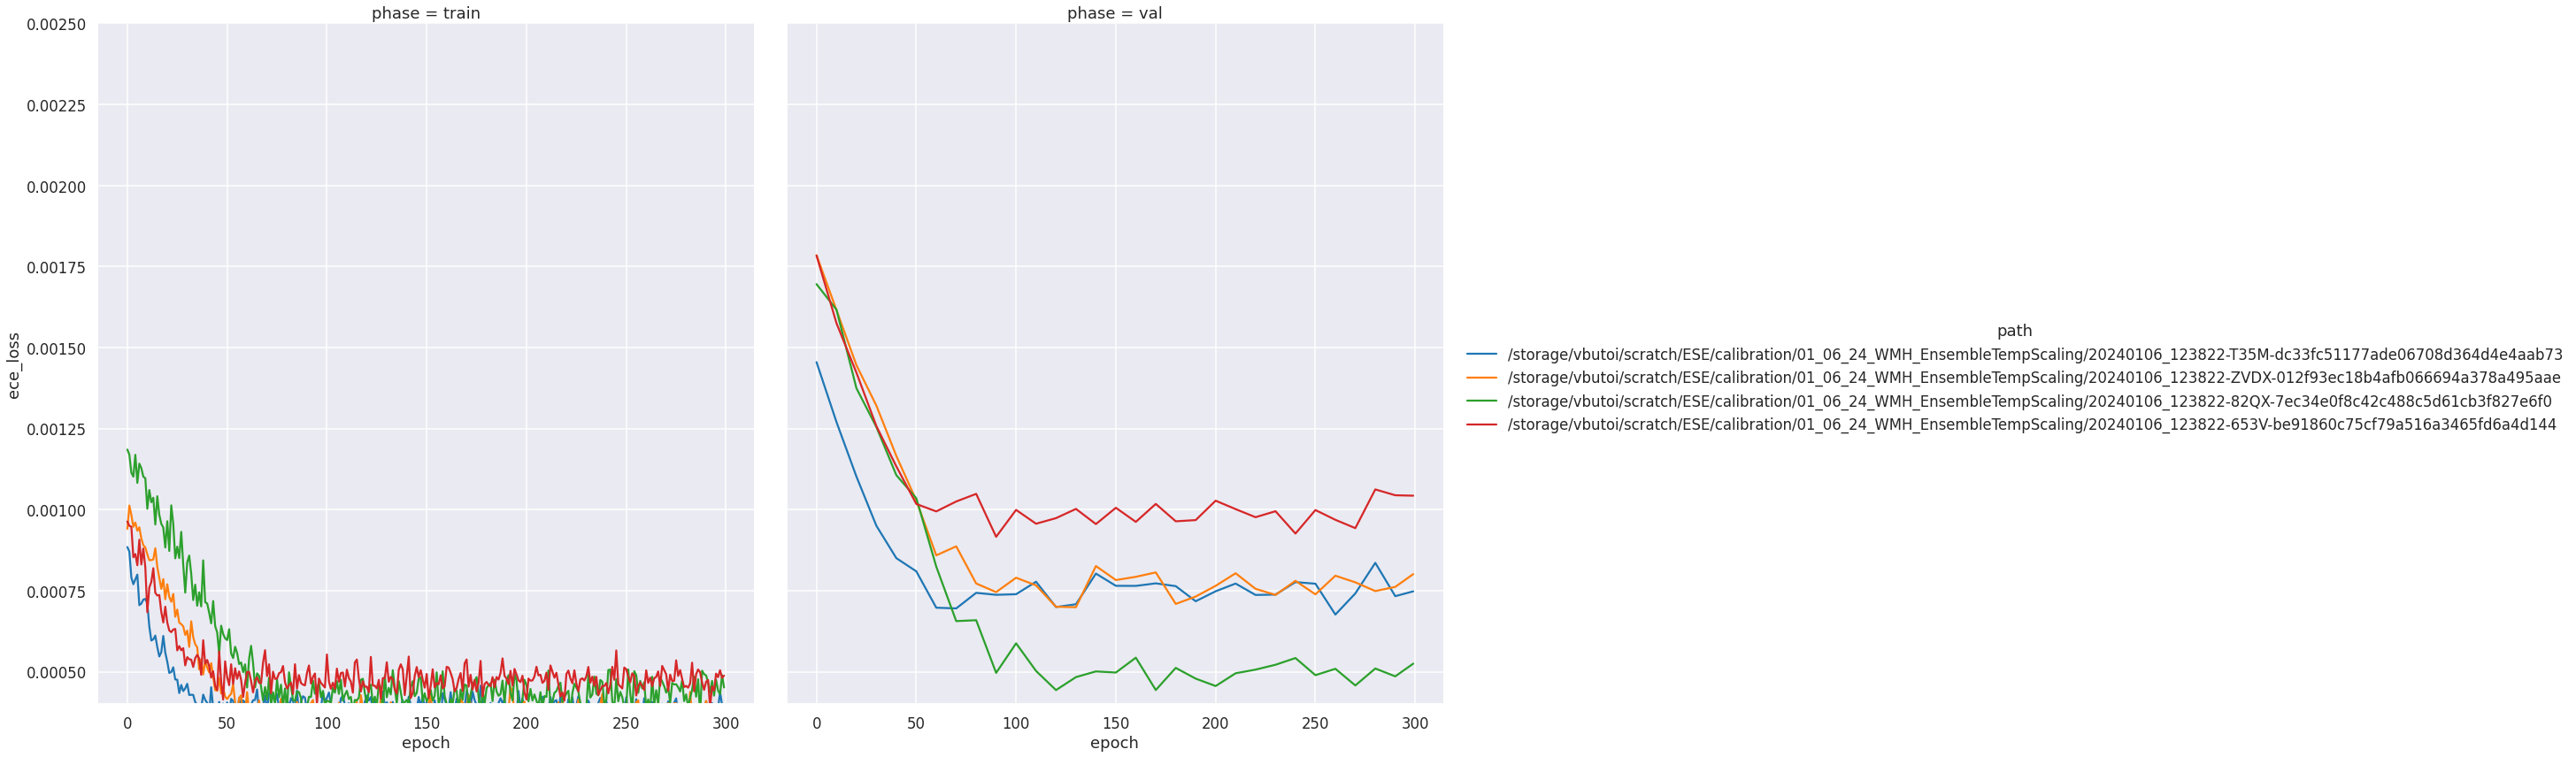

In [7]:
# def has_aug(augmentations):
#     return not(augmentations == 'NaN')
# def mode(slice_batch_size, batch_size, has_aug):
#     return f"slice_batch_size={slice_batch_size}, batch_size={batch_size}, has_aug={has_aug}"
# df.augment(has_aug)
# df.augment(mode)

g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    col='phase',
    hue='path',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# Set the y-axis limits
g.set(ylim=(0.0004, 0.0025))

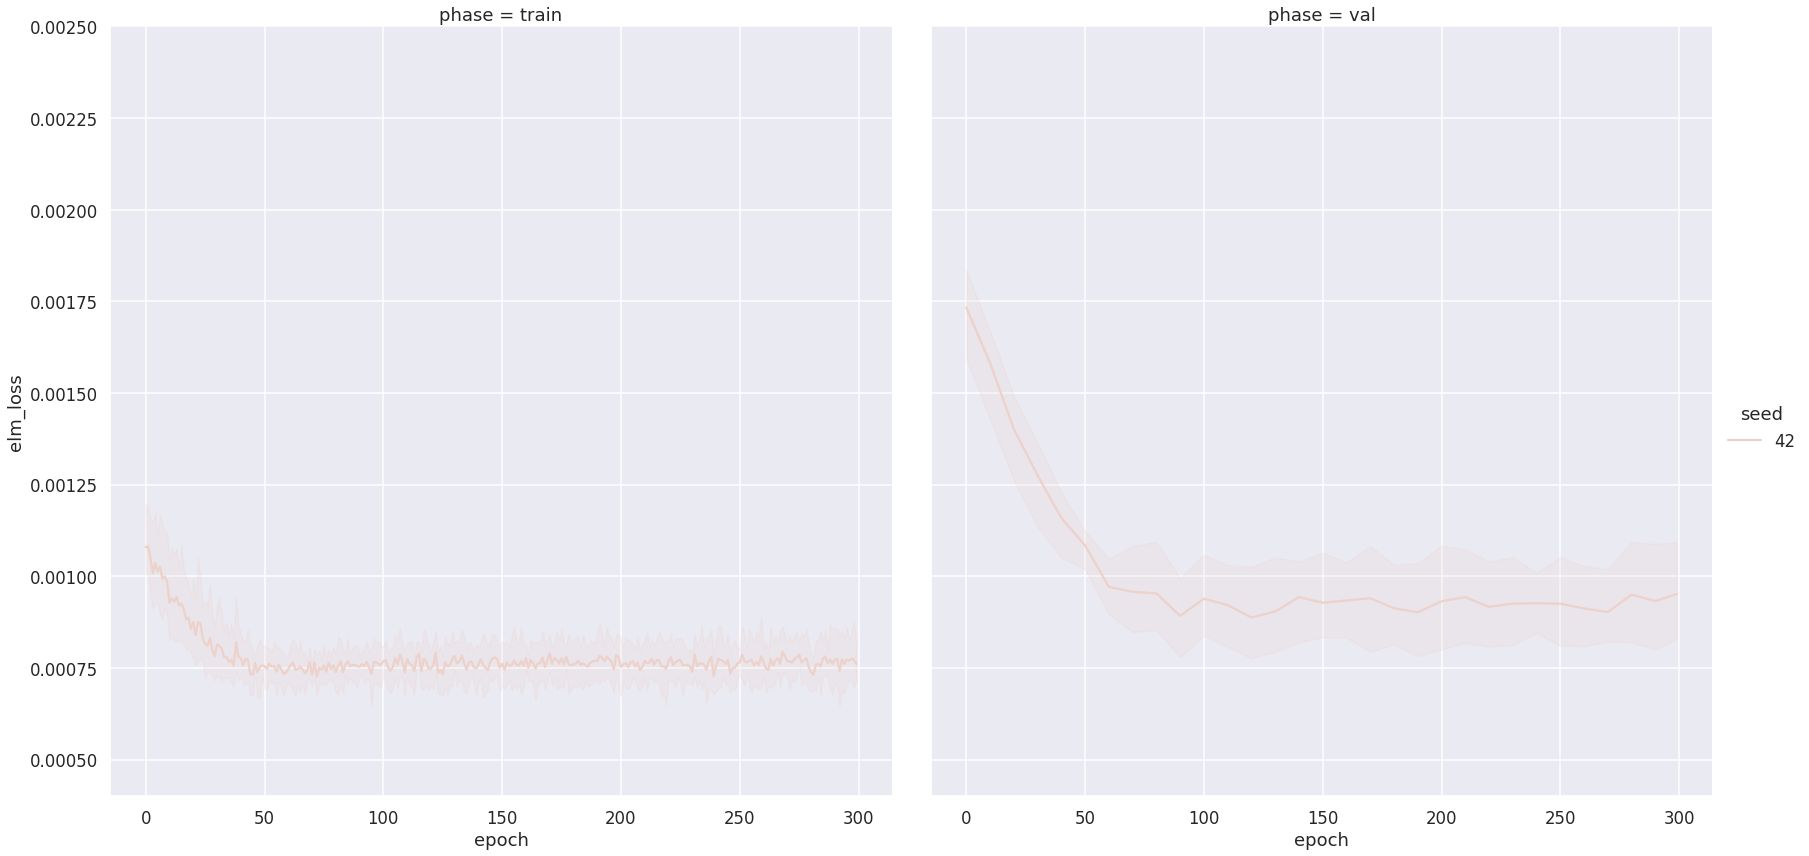

In [5]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='elm_loss',
    col='phase',
    hue='seed',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# Set the y-axis limits
g.set(ylim=(0.0004, 0.0025))

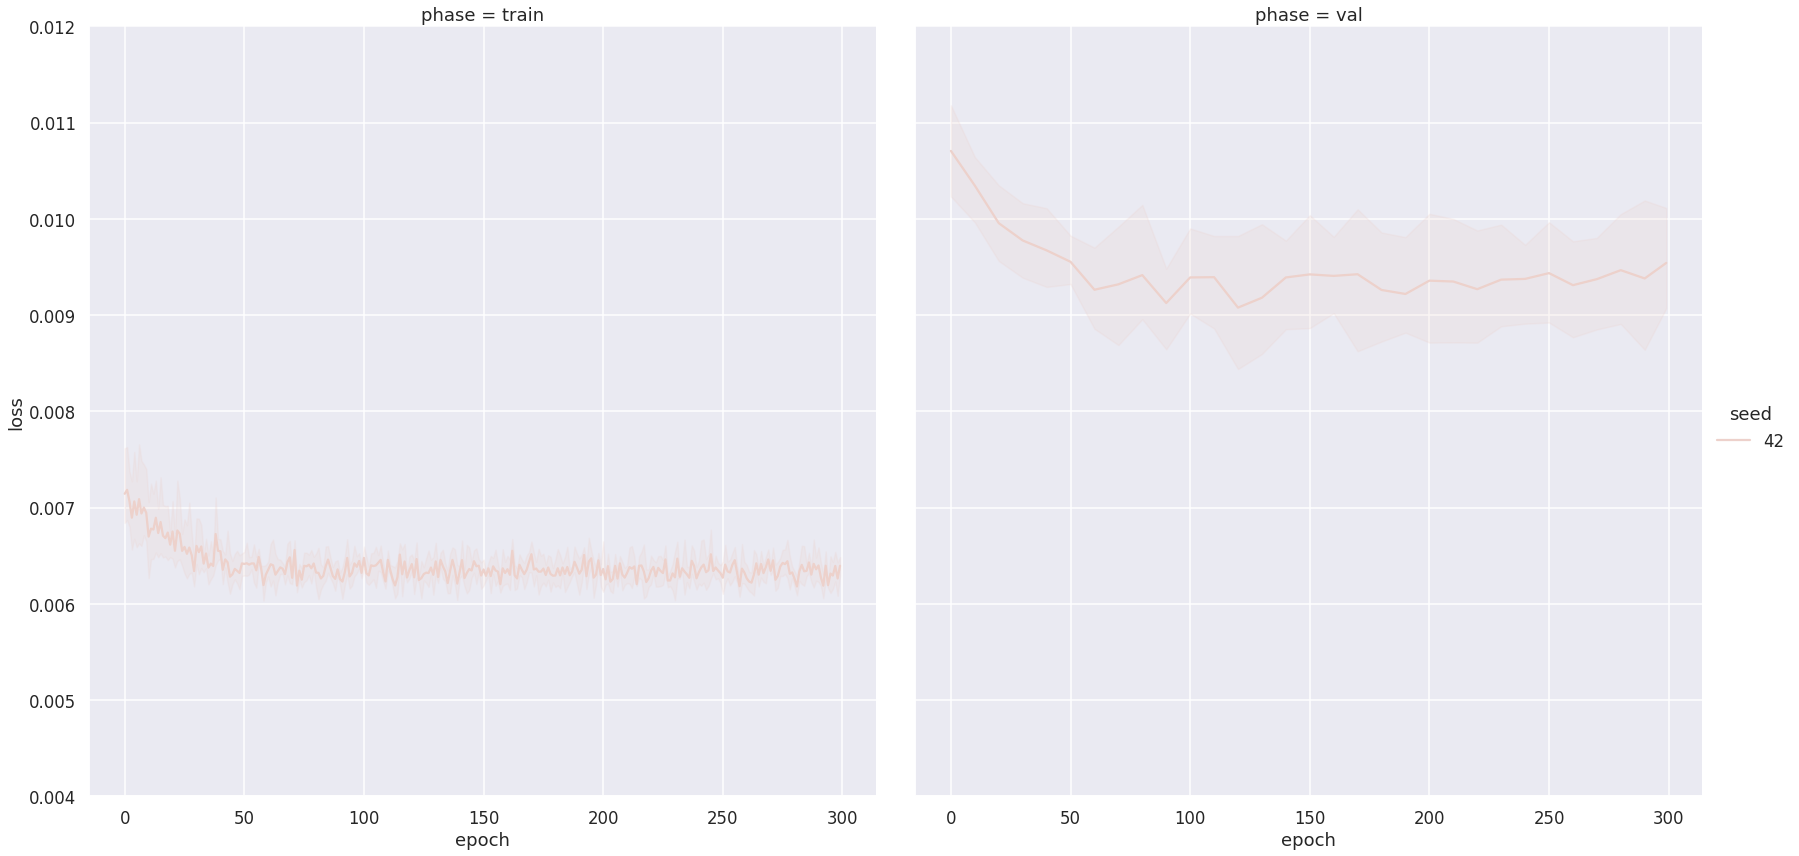

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    col='phase',
    hue='seed',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# Set the y-axis limits
g.set(ylim=(0.004, 0.012))